1
(100, 199)


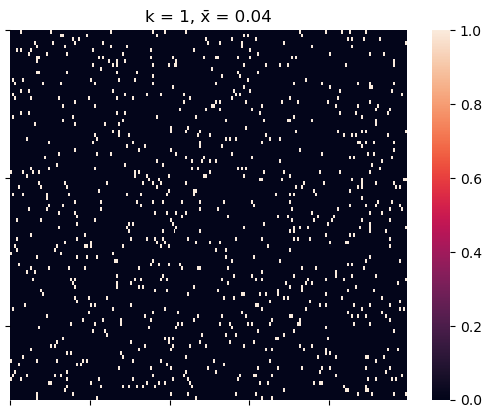

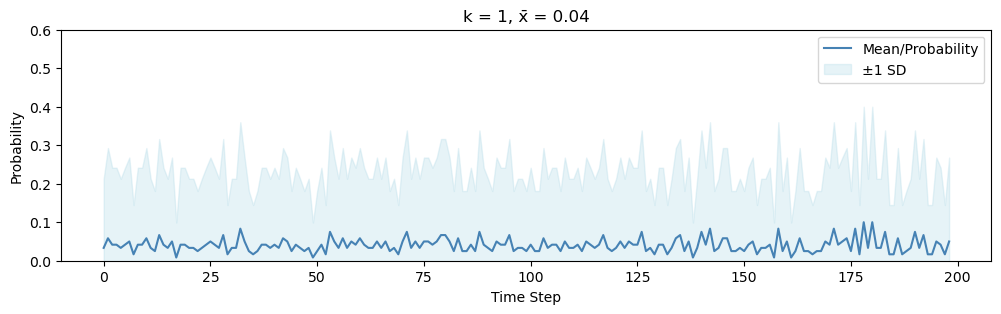

Min probability: 0.0083
Max probability: 0.1000
Overall mean probability: 0.0402
(100, 199)


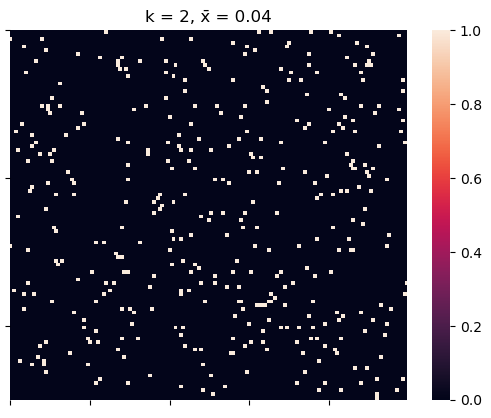

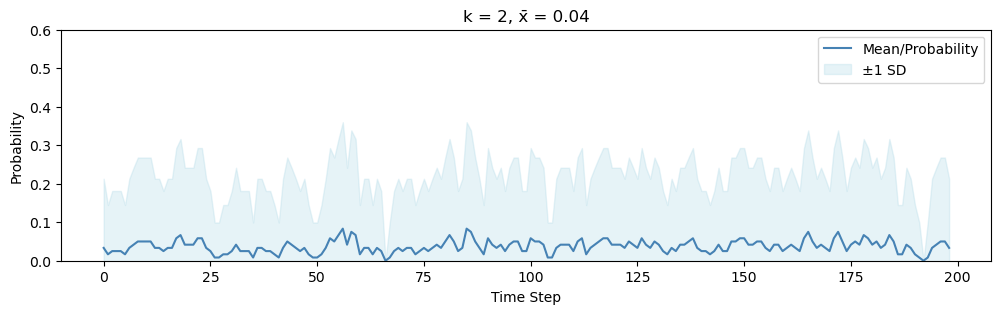

Min probability: 0.0000
Max probability: 0.0833
Overall mean probability: 0.0371
(100, 199)


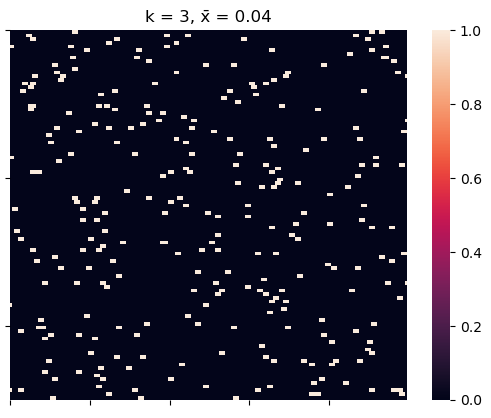

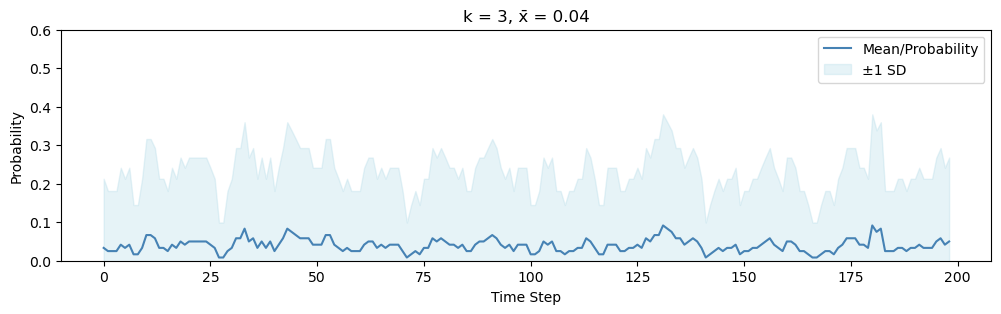

Min probability: 0.0083
Max probability: 0.0917
Overall mean probability: 0.0401
(100, 199)


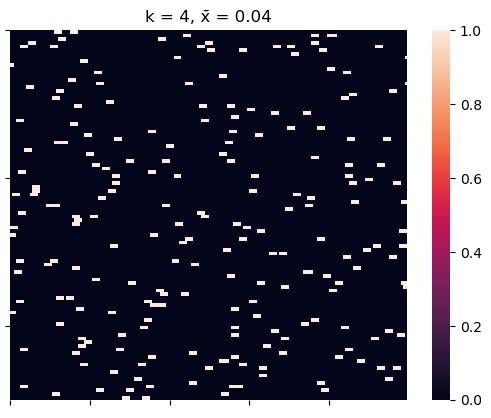

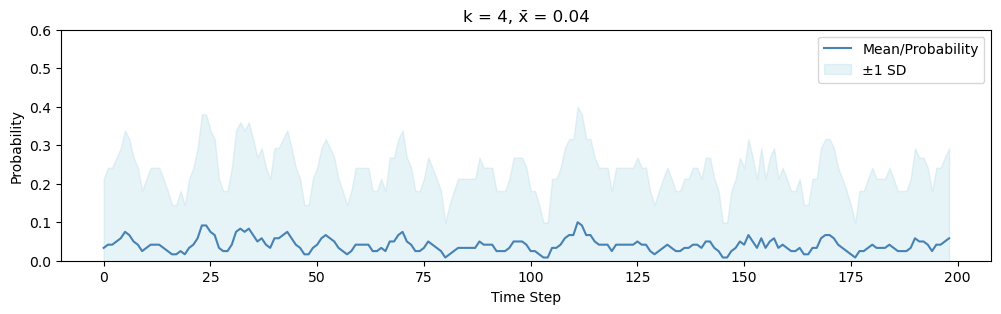

Min probability: 0.0083
Max probability: 0.1000
Overall mean probability: 0.0408
(100, 199)


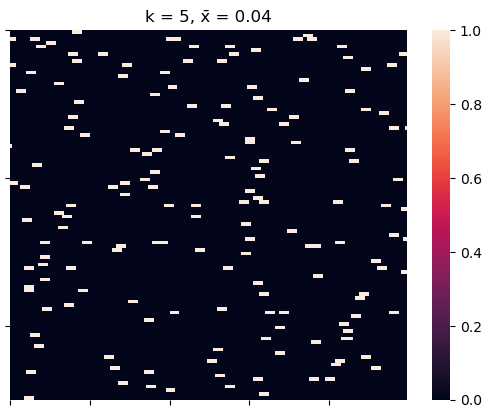

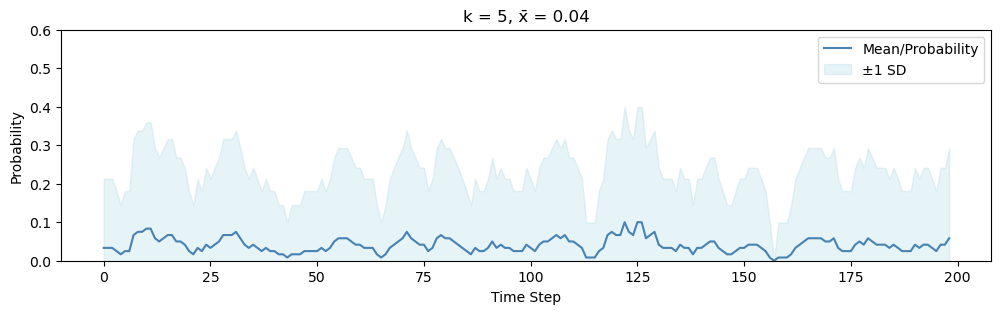

Min probability: 0.0000
Max probability: 0.1000
Overall mean probability: 0.0406
(100, 199)


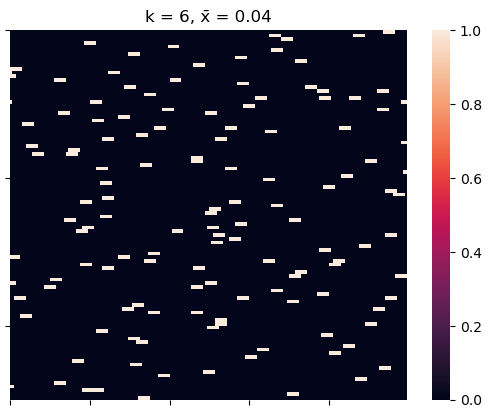

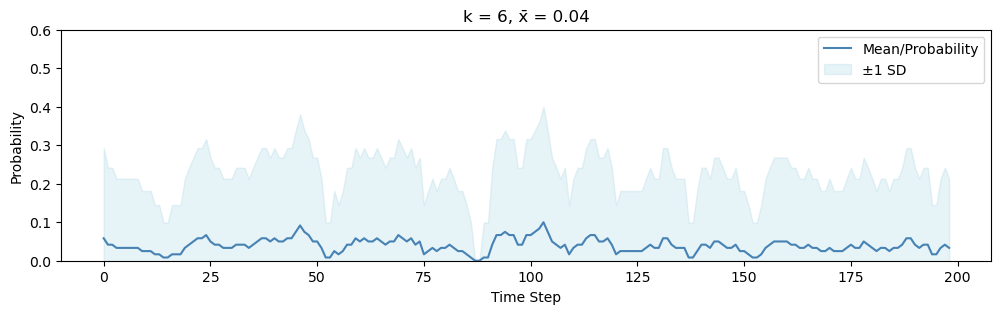

Min probability: 0.0000
Max probability: 0.1000
Overall mean probability: 0.0394
(100, 199)


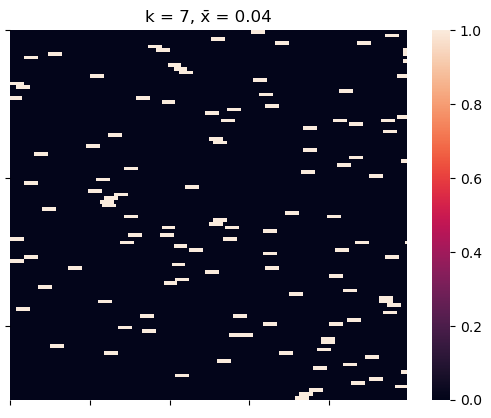

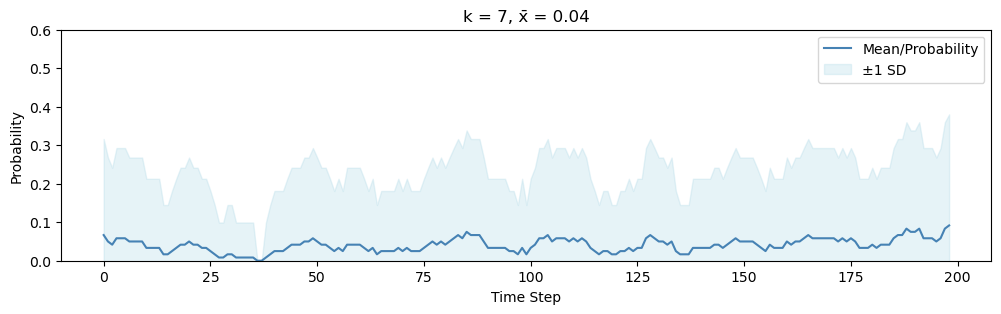

Min probability: 0.0000
Max probability: 0.0917
Overall mean probability: 0.0407
(100, 199)


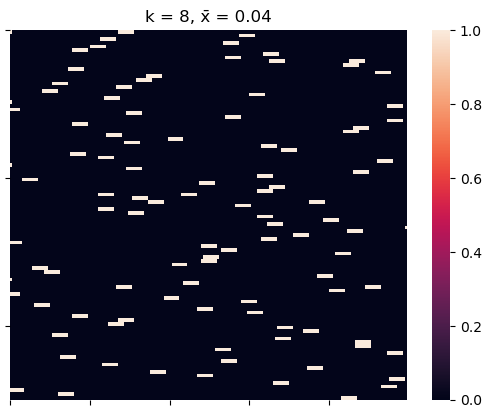

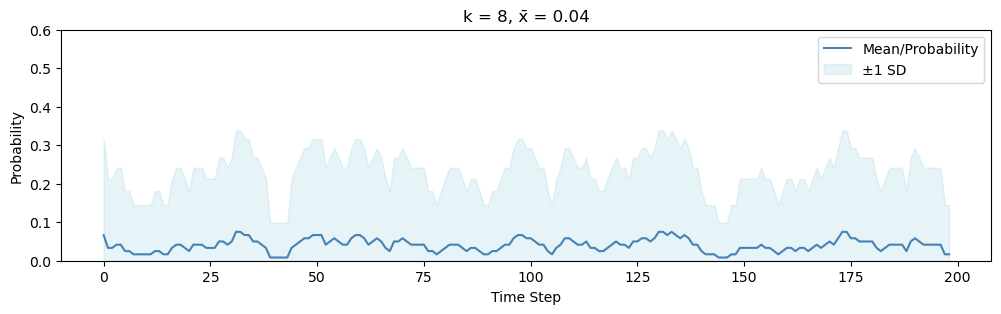

Min probability: 0.0083
Max probability: 0.0750
Overall mean probability: 0.0402


In [1]:
from multisensory_playbook import (
    ClassicalTask,
    DetectionTask,
    DetectionTask_versatile,
    LinearClassifier,
    Trials
)

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import seaborn as sns

path = "./data"

train = 1
print(train)
# "s_range": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Sparse to Dense, sparse is less than 0.2
def calculate_pg(ff, k, N=90, correction=1):
    """
    Use ff to calulate pg, given a k and N
    ff: desired filtered fraction of E 
    pg: probability of E(t)=1 in the base_e (generator)
    k : local on-time duration
    N : number time-steps
    """
    buffer = k
    #pg = (1-fsolve(lambda x: ff-(1-x**k)/(1-x**(N)), 0.9))[0] 
    if correction:
        ff = (1-fsolve(lambda x: ff-(1-x**k)/(1-x**(N+int(buffer)-1*(k-1))), 0.9))[0]

    return ff
    
# Tasks
# Detection task
pe_sparse = 0.04
nb_steps = 200 #500 
nb_trials = 120 #00 # Original: 100000
classifier_type = LinearClassifier
time_dep = 1 # 1: there is time dependence

pm=1
pc = 0.45



tasks = [
    
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+1-1, k=1), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=1), # sparse     
    
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+2-1,k=2), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=2), # sparse  
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+3-1,k=3), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=3), # sparse
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+4-1,k=4), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=4), # sparse
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+5-1,k=5), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=5), # sparse 
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+6-1,k=6), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=6), # sparse 
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+7-1,k=7), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=7), # sparse
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+8-1,k=8), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=8) # sparse
    
]
import numpy as np
import matplotlib.pyplot as plt
def plot_avE(E):
    # Calculate mean (which is equivalent to probability for binary data)
    avE = np.mean(full_trials_train.E, axis=0)

    # Calculate standard deviation for binary data
    stdE = np.sqrt(avE * (1 - avE))

    plt.figure(figsize=(12, 3))
    plt.plot(avE, label='Mean/Probability', color='steelblue')
    plt.fill_between(range(len(avE)), avE - stdE, avE + stdE, alpha=0.3, color='lightblue', label='±1 SD')
    plt.title(f"k = {train_k}, x̄ = {np.round(np.mean(avE),2)}")
    plt.ylabel('Probability')
    plt.xlabel('Time Step')
    plt.legend()
    plt.ylim(0, 0.6)  # Set y-axis limits to 0-1 for probability
    plt.show()

    # Print some statistics
    print(f"Min probability: {np.min(avE):.4f}")
    print(f"Max probability: {np.max(avE):.4f}")
    print(f"Overall mean probability: {np.mean(avE):.4f}")
k_list = [1,2,3,4,5,6,7,8]
# Training all classifiers
if train:
    for a, task in enumerate(tasks):
        train_k = k_list[a]
        #print(task)
    
        full_trials_train = task.generate_trials(nb_trials, nb_steps+train_k-1)
        all_E = full_trials_train.E
        # Select 100 non-zero trials 
        non_zero_trials = all_E[np.any(all_E != 0, axis=1)] 
        E = non_zero_trials[:100] if len(non_zero_trials) >= 100 else non_zero_trials
        print(E.shape)
        
        avE = np.mean(E, axis=0)
        sns.heatmap(E)
        #sns.color_palette("rocket_r")
        sns.color_palette("colorblind")
        plt.title(f"k = {train_k}, x̄ = {np.round(np.mean(avE),2)}")
        plt.xticks(np.arange(0, nb_steps, 40))
        plt.yticks(np.arange(0, nb_trials, 40))
        plt.show()

        plot_avE(E)



In [4]:

avE 

array([0.03, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.02, 0.02, 0.02, 0.03, 0.04, 0.04, 0.04, 0.05,
       0.03, 0.03, 0.04, 0.03, 0.02, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.05, 0.03, 0.03, 0.03, 0.03, 0.05, 0.05, 0.05,
       0.04, 0.04, 0.05, 0.05, 0.04, 0.03, 0.04, 0.03, 0.03, 0.04, 0.03,
       0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.03, 0.04,
       0.03, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.09, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.03, 0.02, 0.01, 0.02, 0.02, 0.01, 0.03, 0.05,
       0.05, 0.05, 0.07, 0.07, 0.07, 0.07, 0.05, 0.04, 0.04, 0.05, 0.04,
       0.03, 0.03, 0.04, 0.04, 0.04, 0.05, 0.04, 0.03, 0.03, 0.04, 0.04,
       0.04, 0.03, 0.03, 0.04, 0.04, 0.04, 0.03, 0.04, 0.04, 0.04, 0.05,
       0.04, 0.05, 0.05, 0.07, 0.05, 0.06, 0.06, 0.04, 0.04, 0.04, 0.04,
       0.03, 0.04, 0.03, 0.04, 0.04, 0.05, 0.05, 0.05, 0.04, 0.03, 0.03,
       0.02, 0.02, 0.01, 0.  , 0.  , 0.02, 0.02, 0.

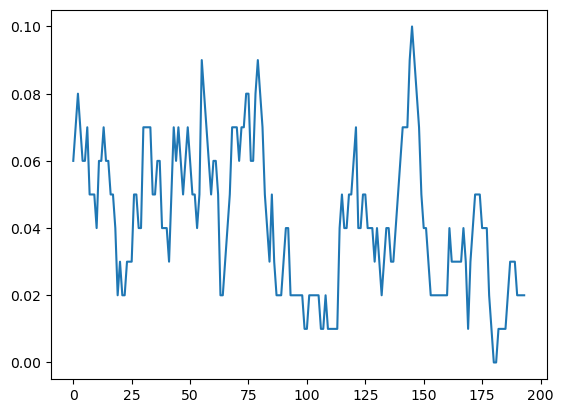

In [66]:
plt.plot(avE, ls='-', marker='')

In [64]:
avE 

array([0.06, 0.07, 0.08, 0.07, 0.06, 0.06, 0.07, 0.05, 0.05, 0.05, 0.04,
       0.06, 0.06, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04, 0.02, 0.03, 0.02,
       0.02, 0.03, 0.03, 0.03, 0.05, 0.05, 0.04, 0.04, 0.07, 0.07, 0.07,
       0.07, 0.05, 0.05, 0.06, 0.06, 0.04, 0.04, 0.04, 0.03, 0.05, 0.07,
       0.06, 0.07, 0.06, 0.05, 0.06, 0.07, 0.06, 0.05, 0.05, 0.04, 0.05,
       0.09, 0.08, 0.07, 0.06, 0.05, 0.06, 0.06, 0.05, 0.02, 0.02, 0.03,
       0.04, 0.05, 0.07, 0.07, 0.07, 0.06, 0.07, 0.07, 0.08, 0.08, 0.06,
       0.06, 0.08, 0.09, 0.08, 0.07, 0.05, 0.04, 0.03, 0.05, 0.03, 0.02,
       0.02, 0.02, 0.03, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.04, 0.05, 0.04, 0.04, 0.05, 0.05, 0.06,
       0.07, 0.04, 0.04, 0.05, 0.05, 0.04, 0.04, 0.04, 0.03, 0.04, 0.03,
       0.02, 0.03, 0.04, 0.04, 0.03, 0.03, 0.04, 0.05, 0.06, 0.07, 0.07,
       0.07, 0.09, 0.1 , 0.09, 0.08, 0.07, 0.05, 0.

In [65]:
E

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

<Axes: >

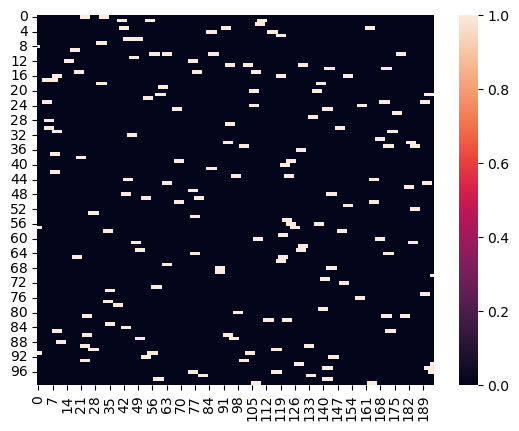

In [48]:
import seaborn as sns
sns.heatmap(E)

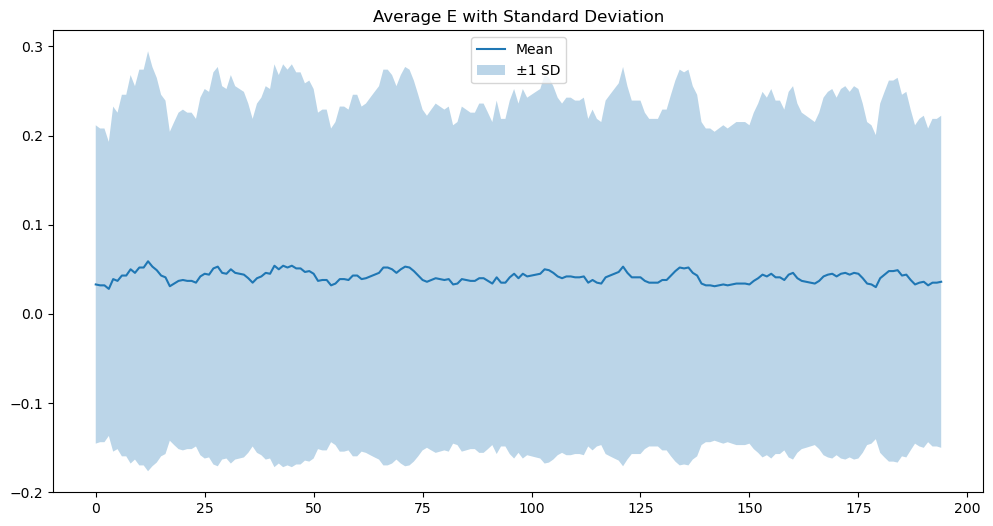

T-test results: t-statistic = -3.0149, p-value = 0.0029


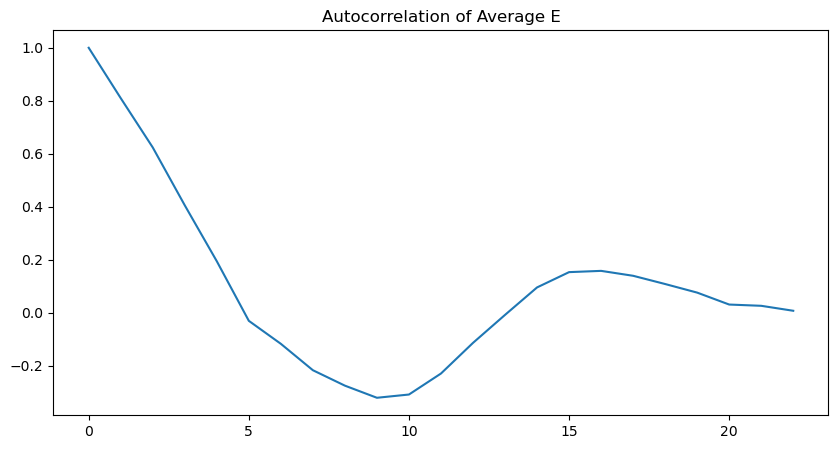

Probability of 1s: First 10 steps = 0.0383, Last 10 steps = 0.0367, Middle = 0.0418
95% CI for mean of E: (0.0405, 0.0422)


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming full_trials_train.E is your 2D array of trials

# 1. Improved visualization
avE = np.mean(full_trials_train.E, axis=0)
stdE = np.std(full_trials_train.E, axis=0)
plt.figure(figsize=(12, 6))
plt.plot(avE, label='Mean')
plt.fill_between(range(len(avE)), avE - stdE, avE + stdE, alpha=0.3, label='±1 SD')
plt.title('Average E with Standard Deviation')
plt.legend()
plt.show()

# 2. Statistical test (t-test comparing edges to middle)
edge_size = 10
edge_values = np.concatenate([avE[:edge_size], avE[-edge_size:]])
middle_values = avE[edge_size:-edge_size]
t_stat, p_value = stats.ttest_ind(edge_values, middle_values)
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# 3. Autocorrelation
from statsmodels.tsa.stattools import acf
autocorr = acf(avE)
plt.figure(figsize=(10, 5))
plt.plot(autocorr)
plt.title('Autocorrelation of Average E')
plt.show()

# 4. Edge-specific analysis
prob_first_10 = np.mean(full_trials_train.E[:, :10])
prob_last_10 = np.mean(full_trials_train.E[:, -10:])
prob_middle = np.mean(full_trials_train.E[:, 10:-10])
print(f"Probability of 1s: First 10 steps = {prob_first_10:.4f}, "
      f"Last 10 steps = {prob_last_10:.4f}, Middle = {prob_middle:.4f}")

# 5. Bootstrapping (simplified example)
n_bootstrap = 1000
bootstrap_means = np.array([np.mean(np.random.choice(avE, size=len(avE), replace=True)) 
                            for _ in range(n_bootstrap)])
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% CI for mean of E: ({ci_lower:.4f}, {ci_upper:.4f})")